# <span style="color:red"> Numerical Simulation 07 </span>

## Exercise 07.1

For this part of the simulation we needed the instantaneous values of energy for particles $E/N$ and pressure $P$, so I've modified the code to do this. Before taking these values I needed my simulation to be equilibrated, so I've done it manually for each phase, making an easy plot of the first $500$ values, to see where my system equilibrate. I haven't reported the equilibration plots, because they where useless, in my opinion, but I report what I've discovered from them:
- solid phase: ($\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)) Starting from a fcc configuration I've seen that the equilibration is very short: around 50 steps for the energy, and around 100 steps for pressure. Obviously I've taken the higher value to do it. A nother thing that I've checked was acceptance, and set $\delta=0.1$ to have it around 50%.

- liquid phase: ($\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)) I've started again from a fcc configuration, but this time the equilibration was a bit longer, and it needed around $200$ steps to equilibrate. I've also found that with a $\delta=0.2$ the empirical law for acceptance was respected.

- gas phase: ($\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)) For this one I've started my simulation from a final configuration of the liquid phase, and for this reason equilibration was nearly not necessary, it takes really few steps. About acceptance the gas was more difficult. Indeed even increasing $\delta$ the acceptance was always higher than 60%. After some trials I've set $\delta=3$ that gave me an acceptance around 65%


Once the equilibration was done I can start doing the statistical part of this excercise, that is about the blocking method, using the $M=10^5$ measures I've taken of my systems. All the simulation ran with $108$ particles.

**Autocorrelation**

We konw that that the Monte Carlo steps of this simulation are correlated, but how long this correlation last? To study this I've computed and plotted the autocorrelation function for each phase, for a number of steps from 1 to 200 (or 100 for the gas). $$ C(k)=\frac{\langle Q_{i}Q_{i+k} \rangle - {\langle Q_{i} \rangle}^2 }{\langle Q_{i}^2 \rangle-{\langle Q_{i} \rangle}^2}$$ 
The results are shown in the following plots, and they show that around 100 or 200 steps (it depends on the case) the correlation dies, so it's enough to take block with a larger number of steps to avoid this problem.


**Solid phase**

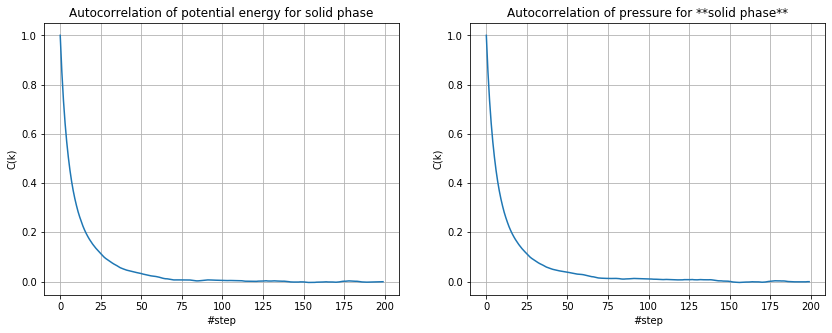

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def corr(k, v):
    prod=0
    sum=0
    sum2=0
    for j in range(0,M-k):
        prod+=v[j]*v[j+k]
        sum+=v[j]
        sum2+=v[j]*v[j]
    prod/=(M-k)
    sum/=(M-k)
    sum2/=(M-k)
    return (prod-sum*sum)/(sum2-sum*sum)

M=5*pow(10,5)
epot, press=np.loadtxt("output.instant.S", unpack=True)
r=200
x=np.arange(r)
Ce=np.zeros(r)
Cp=np.zeros(r)
for i in range(r):
    Ce[i]=corr(i,epot)
    Cp[i]=corr(i,press)

fig=plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(x,Ce)
plt.title ("Autocorrelation of potential energy for solid phase")
plt.xlabel('#step')
plt.ylabel('C(k)')
plt.grid(True)

plt.subplot(122)
plt.plot(x,Cp)
plt.title ("Autocorrelation of pressure for **solid phase**")
plt.xlabel('#step')
plt.ylabel('C(k)')
plt.grid(True)

plt.show()

**Liquid phase**

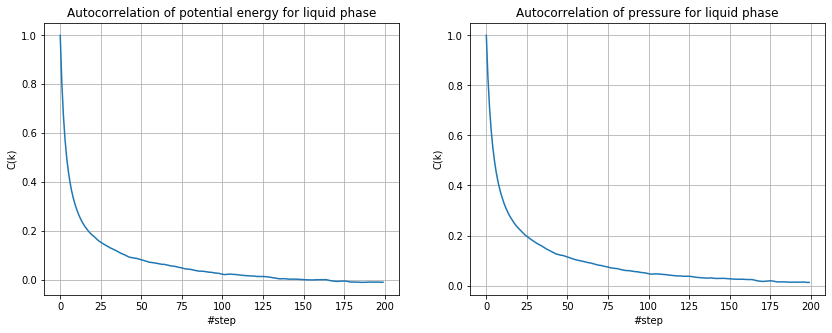

In [6]:
epot, press=np.loadtxt("output.instant.L", unpack=True)
for i in range(r):
    Ce[i]=corr(i,epot)
    Cp[i]=corr(i,press)

fig=plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(x,Ce)
plt.title ("Autocorrelation of potential energy for liquid phase")
plt.xlabel('#step')
plt.ylabel('C(k)')
plt.grid(True)

plt.subplot(122)
plt.plot(x,Cp)
plt.title ("Autocorrelation of pressure for liquid phase")
plt.xlabel('#step')
plt.ylabel('C(k)')
plt.grid(True)

plt.show()

**Gas phase**

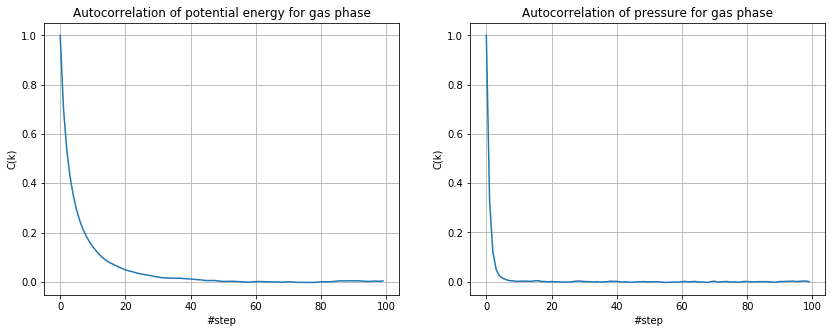

In [7]:
epot, press=np.loadtxt("output.instant.G", unpack=True)
for i in range(r):
    Ce[i]=corr(i,epot)
    Cp[i]=corr(i,press)

fig=plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(x,Ce)
plt.title ("Autocorrelation of potential energy for gas phase")
plt.xlabel('#step')
plt.ylabel('C(k)')
plt.grid(True)

plt.subplot(122)
plt.plot(x,Cp)
plt.title ("Autocorrelation of pressure for gas phase")
plt.xlabel('#step')
plt.ylabel('C(k)')
plt.grid(True)

plt.show()

**Statistical uncertainties**

The question now is: "how many steps for block we shold use to avoid to underestimate the statistical uncertainties?" To answer this I've tried dividing my $M=10^5$ measures in blocks with different sizes and then plotting the uncertainties as a function of the number of steps in each block ($L=M/N$). I've tested values of $L$ from $50$ to $5000$, and I've intentionally decided to not go under $50$ steps per block, because the code was really too slow compiling with $L<50$, so I've tried startin from $50$, and I've seen that the trend for the uncertainties is perfectly visible, even starting from there. What we can see in this trend is that we have an initial phase in which the uncertainties grows, and then (around 1000/2000 steps) they start fluctuates around a mean value.

I wanted to see better what was happening in the initial phase, so I've done two plots for each: in the first plot I've done a finer sampling just from $L=50$ to $L=500$, while in the second plot I've shown all the trend from $L=50$ to $L=5000$, sampling one out of 50 values. In this way you can see, for each phase and each quantity, the initial rise, and the following fluctuations.

With this information I've uderstood that I've to use at least $L=2000$ (it's larger for the gas phase, around $3000$) for the simulation, to avoid to underestimate errors.

**Solid phase**

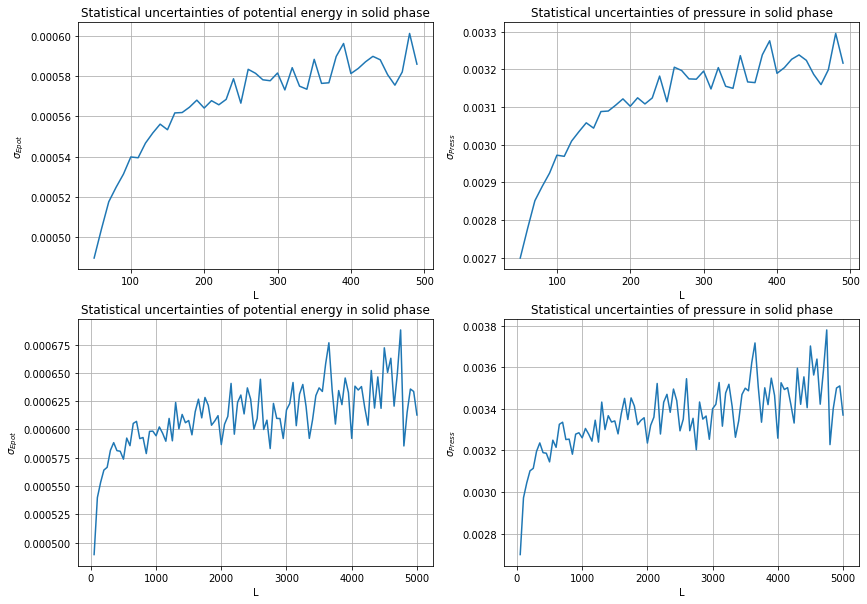

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
M=5*pow(10,5)
epot, press=np.loadtxt("output.instant.S", unpack=True)

def error(AV,AV2,n):  
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)
    
def staterror(M,L,r):
    N=int(M/L)
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)

    for i in range(N):
        sum = 0
        for j in range(L):
            k = j+i*L
            sum += r[k]
        ave[i] = sum/L       
        av2[i] = (ave[i])**2 
        
    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j]
            su2_prog[i] += av2[j]
        sum_prog[i]/=(i+1)
        su2_prog[i]/=(i+1)
        
    return error(sum_prog,su2_prog,N-1) # Statistical uncertainty

errU=np.zeros(45)
errP=np.zeros(45)
j=0
for i in range (50,500,10):
    L=i
    errU[j]=staterror(M,L,epot)
    errP[j]=staterror(M,L,press)
    j+=1
    
x=np.arange(j)
x*=10
x+=50

fig=plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(x,errU,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Epot}$')
plt.title("Statistical uncertainties of potential energy in solid phase")
plt.grid(True)

plt.subplot(222)
plt.plot(x,errP,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Press}$')
plt.title("Statistical uncertainties of pressure in solid phase")
plt.grid(True)

errU=np.zeros(100)
errP=np.zeros(100)
j=0
for i in range (100):
    L=(i+1)*50
    errU[j]=staterror(M,L,epot)
    errP[j]=staterror(M,L,press)
    j+=1
    
x=np.arange(j)
x+=1
x*=50

plt.subplot(223)
plt.plot(x,errU,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Epot}$')
plt.title("Statistical uncertainties of potential energy in solid phase")
plt.grid(True)

plt.subplot(224)
plt.plot(x,errP,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Press}$')
plt.title("Statistical uncertainties of pressure in solid phase")
plt.grid(True)


plt.show()

**Liquid phase**

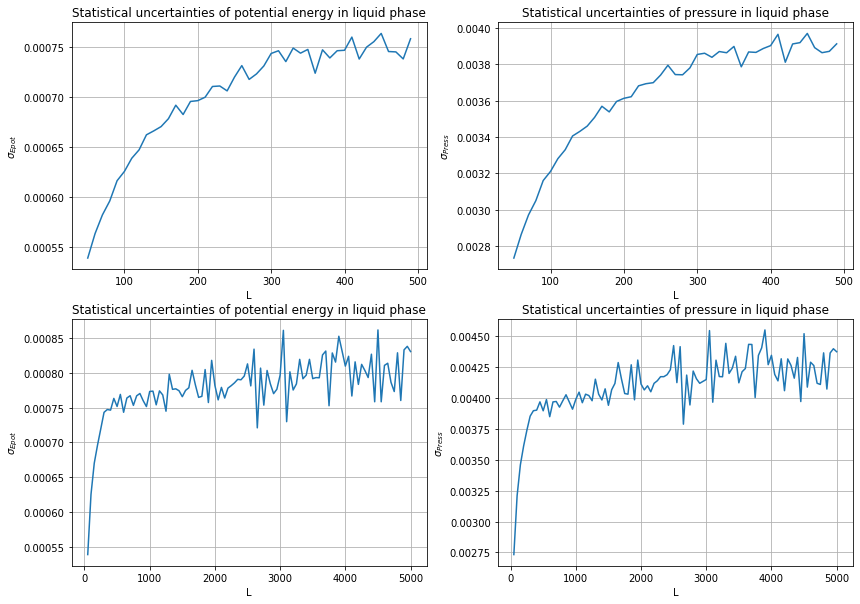

In [15]:
epot, press=np.loadtxt("output.instant.L", unpack=True)
errU=np.zeros(45)
errP=np.zeros(45)
j=0
for i in range (50,500,10):
    L=i
    errU[j]=staterror(M,L,epot)
    errP[j]=staterror(M,L,press)
    j+=1
    
x=np.arange(j)
x*=10
x+=50

fig=plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(x,errU,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Epot}$')
plt.title("Statistical uncertainties of potential energy in liquid phase")
plt.grid(True)

plt.subplot(222)
plt.plot(x,errP,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Press}$')
plt.title("Statistical uncertainties of pressure in liquid phase")
plt.grid(True)

errU=np.zeros(100)
errP=np.zeros(100)
j=0
for i in range (100):
    L=(i+1)*50
    errU[j]=staterror(M,L,epot)
    errP[j]=staterror(M,L,press)
    j+=1
    
x=np.arange(j)
x+=1
x*=50

plt.subplot(223)
plt.plot(x,errU,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Epot}$')
plt.title("Statistical uncertainties of potential energy in liquid phase")
plt.grid(True)

plt.subplot(224)
plt.plot(x,errP,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Press}$')
plt.title("Statistical uncertainties of pressure in liquid phase")
plt.grid(True)


plt.show()

**Gas phase**

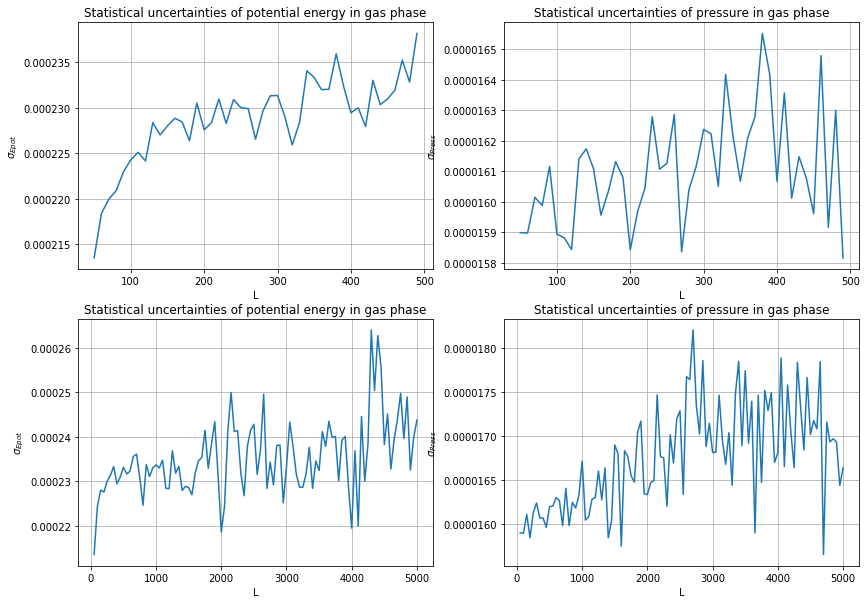

In [24]:
epot, press=np.loadtxt("output.instant.G", unpack=True)
errU=np.zeros(45)
errP=np.zeros(45)
j=0
for i in range (50,500,10):
    L=i
    errU[j]=staterror(M,L,epot)
    errP[j]=staterror(M,L,press)
    j+=1
    
x=np.arange(j)
x*=10
x+=50

fig=plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(x,errU,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Epot}$')
plt.title("Statistical uncertainties of potential energy in gas phase")
plt.grid(True)

plt.subplot(222)
plt.plot(x,errP,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Press}$')
plt.title("Statistical uncertainties of pressure in gas phase")
plt.grid(True)

errU=np.zeros(100)
errP=np.zeros(100)
j=0
for i in range (100):
    L=(i+1)*50
    errU[j]=staterror(M,L,epot)
    errP[j]=staterror(M,L,press)
    j+=1
    
x=np.arange(j)
x+=1
x*=50

plt.subplot(223)
plt.plot(x,errU,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Epot}$')
plt.title("Statistical uncertainties of potential energy in gas phase")
plt.grid(True)

plt.subplot(224)
plt.plot(x,errP,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Press}$')
plt.title("Statistical uncertainties of pressure in gas phase")
plt.grid(True)


plt.show()

## Exercise 07.2-3-4

I've implemented the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$. I've divided this interval in $100$ bins, and made an histogram in which I've added "+2" each time I found a couple of particles ad a distance between $r$ and $r+\delta r$, $\delta r$ is the bin size. At the end I have to normalize each bin dividing it for $\rho N \Delta V(r)$, where $$\Delta V(r)=\frac{4\pi}{3}[(r+\delta r)^3-r^3]$$ 
I've printed the average values of this histogram in each block and the final average value of $g(r)$ with statistical uncertainties. Then I've added this part of code to the previous implemented code of Molecular Dynamics, and calculated $g(r)$ even with that. Obviously I've run the equilibration before taking measures (as explained in excercise 7.1 for the Monte Carlo code, and as in 4.1 for the Molecular Dynamics code).

- The Monte Carlo NVT code was runned with $N=100$ blocks, and $L=2000$ steps for block, for a total of $M=2*10^5 steps$ (I've used of $M=3*10^5$ for the gas phase). 
- The Molecular Dynamics NVE code was runned with $n_{steps}=10^6$, because the code was done taking a measue out of $10$, so in this way I've obtained $M=10^5$ values.


**Notes**

The comparison between the two codes was done only for the $g(r)$ and as you can see from the plots, the results are very simila, and that's noticeable, because they refers to different situations. Indeed with the molecular dynamics NVE code we were in the microcanonical ensemble (internal energy fixed, but not temperature), while now we are in the canonical ensemble (at fixed temperature). I've plotted the modulus of the difference between the two functions, and it's clear that there aren't big differences. Even if it's true that we are in different ensemble the equivalence of the radial distributions can be justified by the fact that the microcanonical enseble was run after equilibration, so in acondition of very small fluctuations of temperature.

A difference between the two results is that the NVE has bigger uncertainties, but I think this could be a conseguence of having runned the NVE code with a fewer number of steps. Due to the fact that this code is slower that the Monte Carlo one, it was really expensive to run with the double of steps, so I've decided to accept these values. 

The results of $g(r)$shows some physical properties of the system: 
- for all the phases under a certain radius (smaller than 1) the distribution is null, and that represents the core-repulsion of Lennar Jones potential that avoids compenetrations of particels.
- in solid phase is clearly visible a periodicity, that shows the existence of a crystalline structure.
- in liquid phase there is still a periodicity, but it's more "relaxed".
- the gas phase shows no periodicity, and $g(r)$ tends to $1$ for large radius.

In the plots of pressure and energy the results are shown in units of the SI, so I've used the following parameters to convert them form Lennard-Jones units: $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu.

**Solid phase**

$\rho^\star = 1.1$, $T^\star = 0.8$, cut-off radius: $r_c = 2.2$

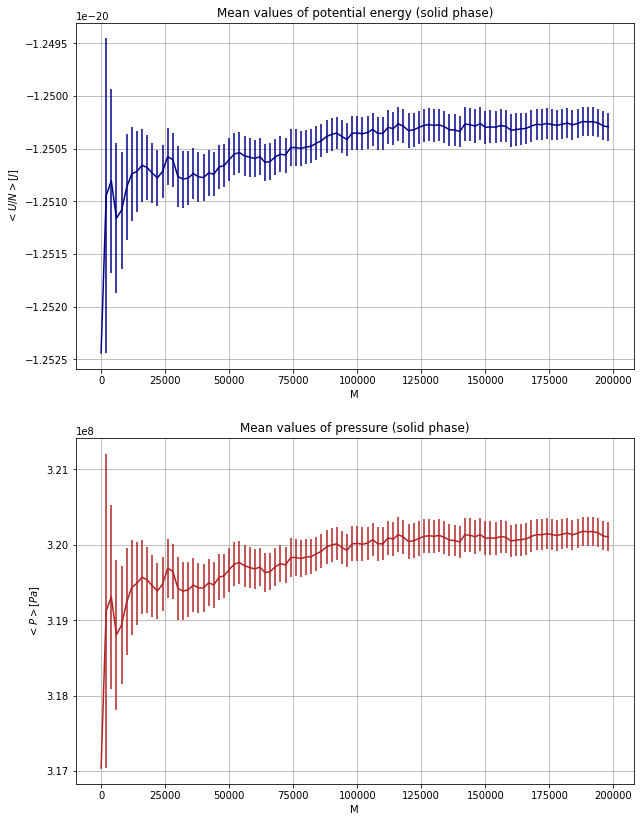

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

epskb=120
eps=120*1.380649*pow(10,-23)
sigma=0.34*pow(10,-9)
sigma3=pow(sigma,3)
m=39.948*1.6605*pow(10,-27)

x = np.arange(100)
x*=2000

Press, errPress =np.loadtxt("output.pr.S", usecols=(2,3), unpack=True)
Epot, errPot =np.loadtxt("output.ep.S", usecols=(2,3), unpack=True)

fig=plt.figure(figsize=(10,14))

plt.subplot(211)
plt.errorbar(x, Epot*eps, yerr=errPot*eps, color="darkblue")
plt.xlabel('M')
plt.ylabel('$<U/N> [J]$')
plt.title("Mean values of potential energy (solid phase)")
plt.grid(True)

plt.subplot(212)
plt.errorbar(x, Press*eps/sigma3, yerr=errPress*eps/sigma3, color="firebrick")
plt.xlabel('M')
plt.ylabel('$<P> [Pa]$')
plt.title("Mean values of pressure (solid phase)")
plt.grid(True)

plt.show()

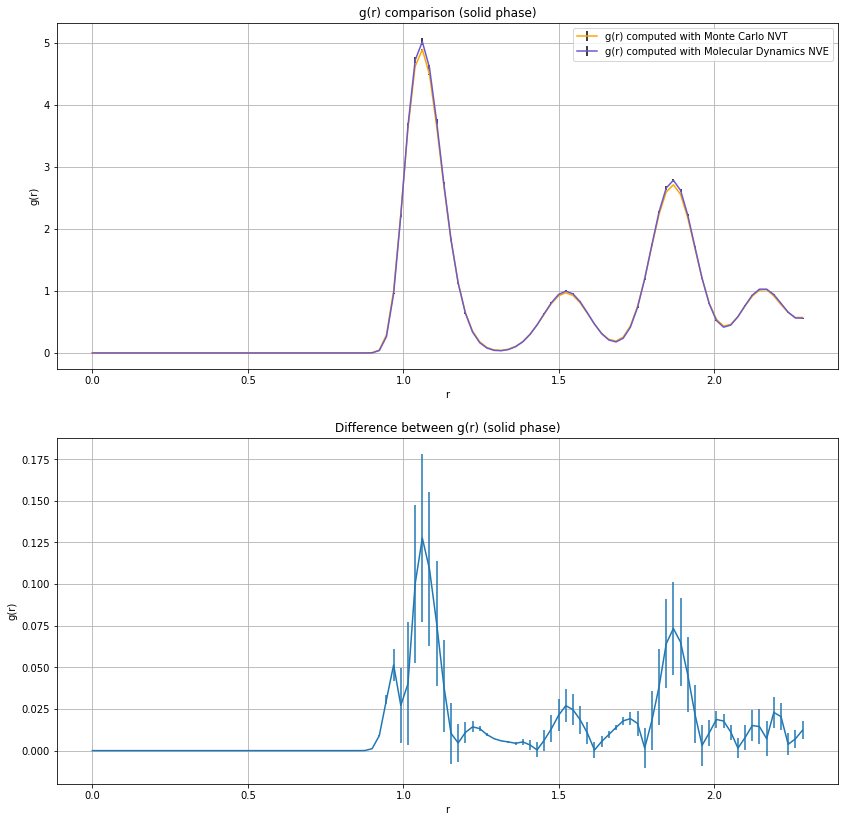

In [27]:
bin_size=pow(108/1.1,1/3.)/200
x = np.arange(100)
x=np.ndarray.astype(x, dtype=float)
x*=bin_size

gofr, err=np.loadtxt("output.gave.S", unpack=True)
gofr2, err2=np.loadtxt("NVE.gave.S", unpack=True)

fig=plt.figure(figsize=(14,14))
plt.subplot(211)
plt.errorbar(x, gofr, yerr=err, color="orange", ecolor="black", label="g(r) computed with Monte Carlo NVT")
plt.errorbar(x, gofr2, yerr=err2,color="slateblue", ecolor="black", label="g(r) computed with Molecular Dynamics NVE")
plt.xlabel('r')
plt.ylabel('g(r)')
plt.legend()
plt.title("g(r) comparison (solid phase)")
plt.grid(True)

plt.subplot(212)
plt.errorbar(x, np.abs(gofr2-gofr), yerr=pow(err*err+err2*err2,0.5))
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("Difference between g(r) (solid phase)")
plt.grid(True)

plt.show()

**Liquid phase**

$\rho^\star = 0.8$, $T^\star = 1.1$, cut-off radius: $r_c = 2.5$

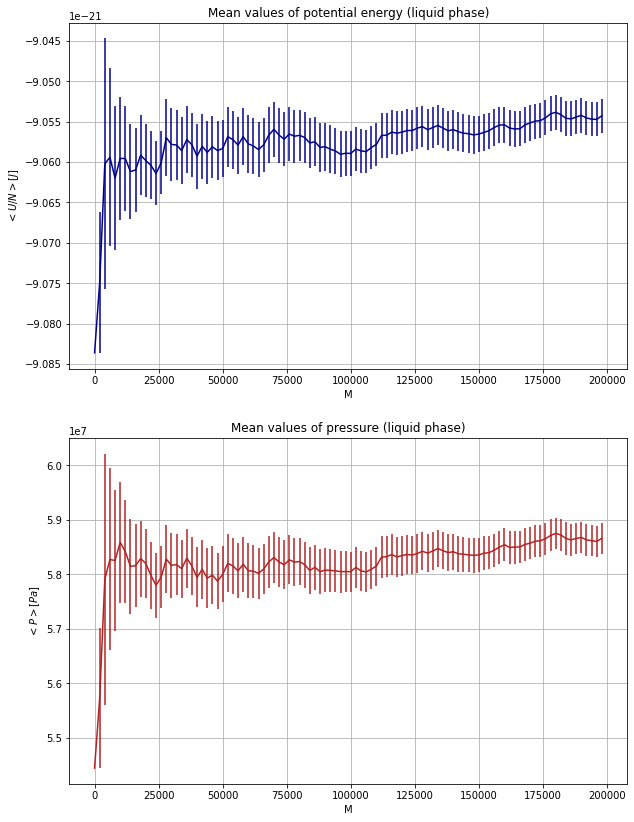

In [21]:
epskb=120
eps=120*1.380649*pow(10,-23)
sigma=0.34*pow(10,-9)
m=39.948*1.6605*pow(10,-27)

x = np.arange(100)
x*=2000

Press, errPress =np.loadtxt("output.pr.L", usecols=(2,3), unpack=True)
Epot, errPot =np.loadtxt("output.ep.L", usecols=(2,3), unpack=True)

fig=plt.figure(figsize=(10,14))

plt.subplot(211)
plt.errorbar(x, Epot*eps, yerr=errPot*eps, color="darkblue")
plt.xlabel('M')
plt.ylabel('$<U/N> [J]$')
plt.title("Mean values of potential energy (liquid phase)")
plt.grid(True)

plt.subplot(212)
plt.errorbar(x, Press*eps/sigma3, yerr=errPress*eps/sigma3, color="firebrick")
plt.xlabel('M')
plt.ylabel('$<P> [Pa]$')
plt.title("Mean values of pressure (liquid phase)")
plt.grid(True)

plt.show()

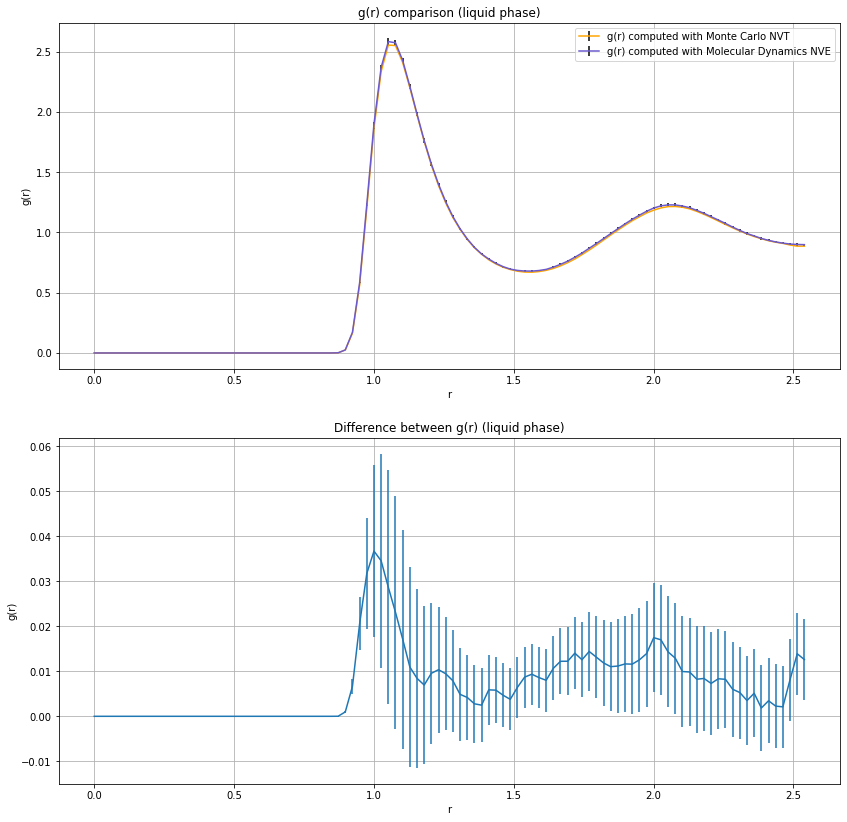

In [30]:
bin_size=pow(108/0.8,1/3.)/200
x = np.arange(100)
x=np.ndarray.astype(x, dtype=float)
x*=bin_size

gofr, err=np.loadtxt("output.gave.L", unpack=True)
gofr2, err2=np.loadtxt("NVE.gave.L", unpack=True)

fig=plt.figure(figsize=(14,14))
plt.subplot(211)
plt.errorbar(x, gofr, yerr=err, color="orange", ecolor="black", label="g(r) computed with Monte Carlo NVT")
plt.errorbar(x, gofr2, yerr=err2,color="slateblue", ecolor="black", label="g(r) computed with Molecular Dynamics NVE")
plt.xlabel('r')
plt.ylabel('g(r)')
plt.legend()
plt.title("g(r) comparison (liquid phase)")
plt.grid(True)

plt.subplot(212)
plt.errorbar(x, np.abs(gofr2-gofr), yerr=pow(err*err+err2*err2,0.5))
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("Difference between g(r) (liquid phase)")
plt.grid(True)

plt.show()

**Gas phase**

$\rho^\star = 0.05$, $T^\star = 1.2$, cut-off radius: $r_c = 5.0$

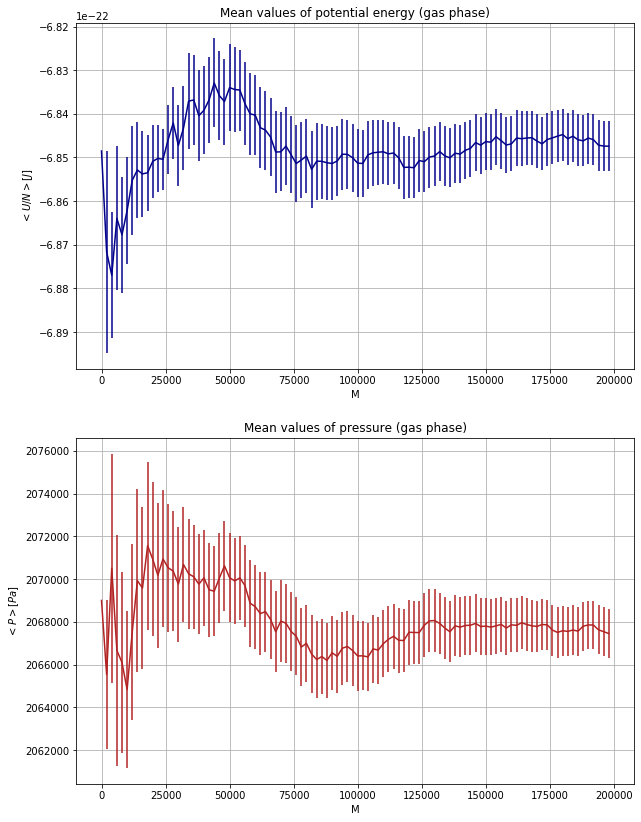

In [25]:
epskb=120
eps=120*1.380649*pow(10,-23)
sigma=0.34*pow(10,-9)
m=39.948*1.6605*pow(10,-27)

x = np.arange(100)
x*=2000

Press, errPress =np.loadtxt("output.pr.G", usecols=(2,3), unpack=True)
Epot, errPot =np.loadtxt("output.ep.G", usecols=(2,3), unpack=True)

fig=plt.figure(figsize=(10,14))

plt.subplot(211)
plt.errorbar(x, Epot*eps, yerr=errPot*eps, color="darkblue")
plt.xlabel('M')
plt.ylabel('$<U/N> [J]$')
plt.title("Mean values of potential energy (gas phase)")
plt.grid(True)

plt.subplot(212)
plt.errorbar(x, Press*eps/sigma3, yerr=errPress*eps/sigma3, color="firebrick")
plt.xlabel('M')
plt.ylabel('$<P> [Pa]$')
plt.title("Mean values of pressure (gas phase)")
plt.grid(True)

plt.show()

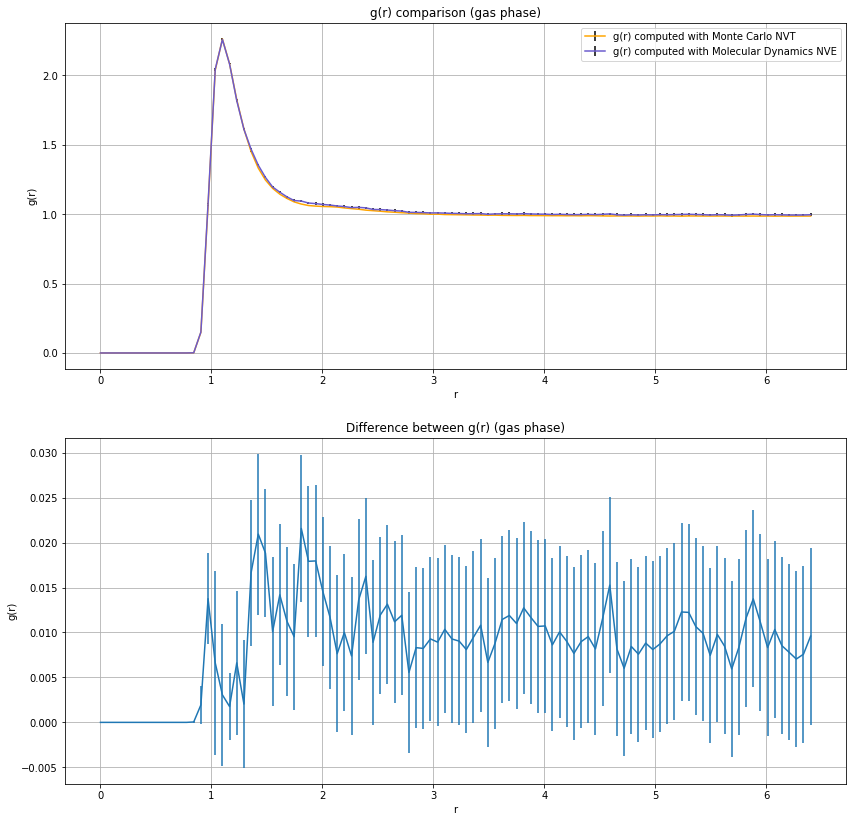

In [28]:
bin_size=pow(108/0.05,1/3.)/200
x = np.arange(100)
x=np.ndarray.astype(x, dtype=float)
x*=bin_size

gofr, err=np.loadtxt("output.gave.G", unpack=True)
gofr2, err2=np.loadtxt("NVE.gave.G", unpack=True)

fig=plt.figure(figsize=(14,14))
plt.subplot(211)
plt.errorbar(x, gofr, yerr=err, color="orange", ecolor="black", label="g(r) computed with Monte Carlo NVT")
plt.errorbar(x, gofr2, yerr=err2,color="slateblue", ecolor="black", label="g(r) computed with Molecular Dynamics NVE")
plt.xlabel('r')
plt.ylabel('g(r)')
plt.legend()
plt.title("g(r) comparison (gas phase)")
plt.grid(True)

plt.subplot(212)
plt.errorbar(x, np.abs(gofr2-gofr), yerr=pow(err*err+err2*err2,0.5))
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("Difference between g(r) (gas phase)")
plt.grid(True)

plt.show()